In [2]:
from random import choice
from string import ascii_lowercase
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
chars = ascii_lowercase
name_list = [''.join(choice(chars) for _ in range(10)) for _ in range(100000)]

In [8]:
def convert(lst):
    dic = {lst[i] for i in range(0,len(lst))}
    return dic
                                 

In [13]:
name_set = convert(name_list)

In [17]:
def quicksort(array):
  if len(array) < 2:
    return array
  else:
    pivot = array[0]
    less = [i for i in array[1:] if i <= pivot]
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

In [18]:
name_list_copy = name_list
start_time = time.time()
sort_list = quicksort(name_list_copy)
end_time = time.time()
sort_runtime = end_time - start_time


In [21]:
print(sort_runtime*1000)

536.6747379302979


### For this assignment I decided to sort this list using quicksort. I chose this based on last week's assignment showing that it is a fast performing algorithm and it did not disappoint by organizing this 100,000 item list in less than a second.

In [24]:
selections = [name_list[9999], name_list[29999], name_list[49999], name_list[69999], name_list[89999], name_list[99999]]

In [25]:
def Linear(list, item):
    position = 0
    while True:
        guess = list[position]
        if guess == item:
            return position
        else:
            position = position + 1
    return None

In [26]:
def Binary(list, item):
    high = len(list)-1
    low = 0
    while low <= high:
        mid = (low + high) // 2
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

In [27]:
linear_runtimes = []

for x in selections:
    start_time = time.time()
    Linear(name_list, x)
    runtime = time.time()- start_time
    linear_runtimes.append(runtime*1000)

In [29]:
binary_runtimes = []

for x in selections:
    start_time = time.time()
    Binary(sort_list, x)
    runtime = time.time()- start_time
    binary_runtimes.append(runtime*1000)

In [31]:
hash_runtimes = []

for x in selections:
    start_time = time.time()
    name_set.remove(x)
    runtime= time.time() - start_time
    hash_runtimes.append(runtime*1000)

In [33]:
data = {"Name": selections, 'Linear Runtime': linear_runtimes, 'Binary Runtime': binary_runtimes, "Hash Runtime": hash_runtimes}
df = pd.DataFrame(data)
df

,Name,Linear Runtime,Binary Runtime,Hash Runtime
0,atbprmjbbm,3.057957,0.082016,0.033855
1,nbowvbpvba,5.855083,0.062943,0.015259
2,xbnpworxvu,8.908987,0.046968,0.015020
3,etthqskptp,14.302015,0.041962,0.015974
4,peundgdepq,17.103910,0.037670,0.014782
5,ktqiyqwvrw,13.973951,0.053883,0.014067


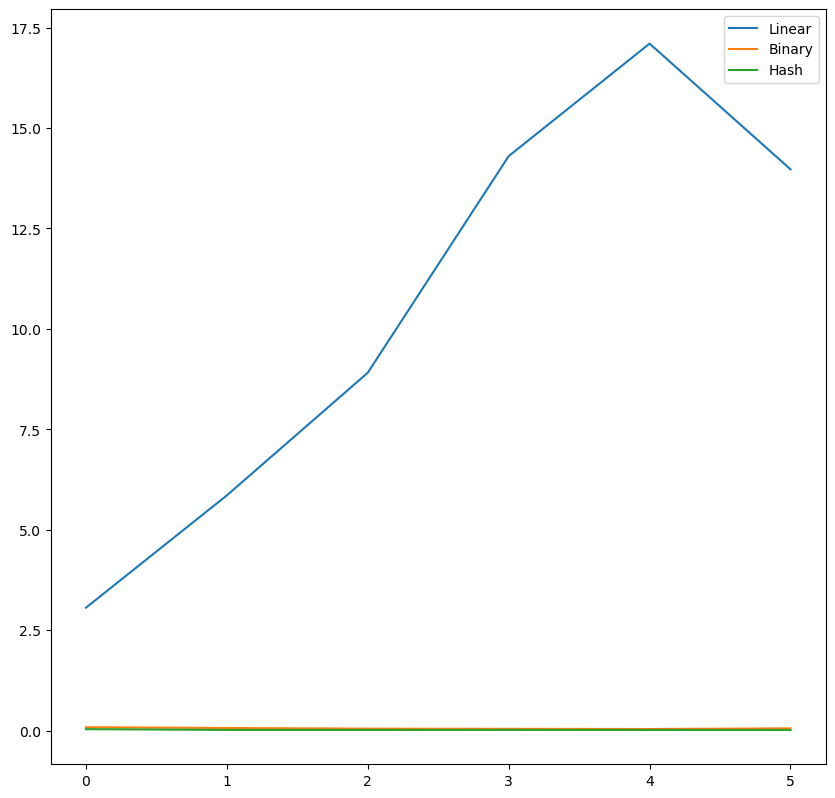

In [41]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(range(6), df['Linear Runtime'], label = 'Linear');
plt.plot(range(6), df['Binary Runtime'], label = 'Binary');
plt.plot(range(6), df['Hash Runtime'], label = 'Hash');
plt.legend();


# Executive Summary

## For this experiment, I put together a 100,000 item list of names. I then created a sorted version of these names and then I created a dictionary out of these names. Afterward, I took out 6 selections from the unsorted list and utilized the linear search algorithm to find them in the unsorted list, the binary search algorithm for the sorted list, and the built-in set lookup for the dictionary. Out of all of these the one that performed the best out of the three of them was the set lookup method, however it is worth noting that the binary search algorithm did perform at a close second.

## The linear search algorithm performed awfully. In comparison to the other two algorithms, it performed more than 10 times as slow when looking at peak positions. Meanwhile, for the other two, it is hard to tell the difference via plot. However, if you look at the table you'll see that they do perform quite differently. While the runtimes to the binary algorithm are varied, the runtimes to the set lookup were consistently at .015ish milliseconds after its initial round. Furthermore, while the binary algorithm was quite fast, its minimum runtime was .0367 milliseconds. This is an incredible speed but it is almost 2.5 times slower than the set lookup.

## All of this has proven to be consistent with Big O notation. Linear selection is at O(n^2), binary selection is at O(log n) while the set lookup, which is based on hash tables, is at O(1) indicating a constant. This is incredibly useful for data engineers when understanding when it comes to search algorithms it is often best to use the high programming built in functioning for hash tables. This is due to the incredible speed in which it can search up values at not only a fast speed but also a consistent one.